###  Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor)
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.ensemble import VotingRegressor
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample

#  Load the dataset

In [2]:
#reading the CSV file into pandas dataframe
df=pd.read_csv('concrete (1).csv')

In [3]:
#basic eda
def eda(df):
    print('--------------------------------------------HEAD-----------------------------------------------')
    print(df.head())
    print('--------------------------------------------TAIL-----------------------------------------------')
    print(df.tail())
    print('--------------------------------------------SHAPE-----------------------------------------------')
    print(df.shape)
    print('--------------------------------------------IS_NULL_SUM-----------------------------------------------')
    print(df.isnull().sum())
    print('--------------------------------------------IS_NA_SUM-----------------------------------------------')
    print(df.isna().sum())
    print('--------------------------------------------COLUMNS-----------------------------------------------')
    print(df.columns)
    print('--------------------------------------------DTYPES-----------------------------------------------')
    print(df.dtypes)
    print('--------------------------------------------DESCRIBE-----------------------------------------------')
    print(df.describe())
    print('--------------------------------------------INFO-----------------------------------------------')
    print(df.info())

In [4]:
eda(df)

--------------------------------------------HEAD-----------------------------------------------
   cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  
--------------------------------------------TAIL-----------------------------------------------
      cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.

# 1. Exploratory data quality report

## 1.1. Univariate analysis

### Description of independent attributes

### Cement

#### Range of values observed

In [5]:
print('--------------------------------------------CEMENT-----------------------------------------------')
print('Range of values: ', df['cement'].max()-df['cement'].min())
print('--------------------------------------------SLAG-----------------------------------------------')
print('Range of values: ', df['slag'].max()-df['slag'].min())
print('--------------------------------------------ASH-----------------------------------------------')
print('Range of values: ', df['ash'].max()-df['ash'].min())
print('--------------------------------------------WATER-----------------------------------------------')
print('Range of values: ', df['water'].max()-df['water'].min())
print('--------------------------------------------SUPERPLASTIC-----------------------------------------------')
print('Range of values: ', df['superplastic'].max()-df['superplastic'].min())
print('--------------------------------------------COARSEAGG-----------------------------------------------')
print('Range of values: ', df['coarseagg'].max()-df['coarseagg'].min())
print('--------------------------------------------FINEAGG-----------------------------------------------')
print('Range of values: ', df['fineagg'].max()-df['fineagg'].min())
print('--------------------------------------------AGE-----------------------------------------------')
print('Range of values: ', df['age'].max()-df['age'].min())

--------------------------------------------CEMENT-----------------------------------------------
Range of values:  438.0
--------------------------------------------SLAG-----------------------------------------------
Range of values:  359.4
--------------------------------------------ASH-----------------------------------------------
Range of values:  200.1
--------------------------------------------WATER-----------------------------------------------
Range of values:  125.2
--------------------------------------------SUPERPLASTIC-----------------------------------------------
Range of values:  32.2
--------------------------------------------COARSEAGG-----------------------------------------------
Range of values:  344.0
--------------------------------------------FINEAGG-----------------------------------------------
Range of values:  398.6
--------------------------------------------AGE-----------------------------------------------
Range of values:  364


#### Central values

In [6]:
for i in df.columns[0:-1]:
    print('---------------------------'+i+' VALUES'+'--------------------------------------')
    Q1=df[i].quantile(q=0.25)
    Q3=df[i].quantile(q=0.75)
    print('1st Quartile (Q1) is: ', Q1)
    print('3st Quartile (Q3) is: ', Q3)
    print('Interquartile range (IQR) is ', stats.iqr(df[i]))
    
    # IQR=Q3-Q1
    #lower 1.5*IQR whisker i.e Q1-1.5*IQR
    #upper 1.5*IQR whisker i.e Q3+1.5*IQR
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('Lower outliers in cement: ', L_outliers)
    print('Upper outliers in cement: ', U_outliers)
    
    print('Number of outliers in '+i+' upper : ', df[df[i]>U_outliers][i].count())
    print('Number of outliers in '+i+' lower : ', df[df[i]<L_outliers][i].count())
    print('% of Outlier in '+i+' upper: ',round(df[df[i]>U_outliers][i].count()*100/len(df)), '%')
    print('% of Outlier in '+i+' lower: ',round(df[df[i]<L_outliers][i].count()*100/len(df)), '%')

---------------------------cement VALUES--------------------------------------
1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625
Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375
Number of outliers in cement upper :  0
Number of outliers in cement lower :  0
% of Outlier in cement upper:  0 %
% of Outlier in cement lower:  0 %
---------------------------slag VALUES--------------------------------------
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95
Lower outliers in cement:  -214.42499999999998
Upper outliers in cement:  357.375
Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0 %
% of Outlier in slag lower:  0 %
---------------------------ash VALUES--------------------------------------
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3
Lower outliers in cement:  -177.45
Upp

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibil

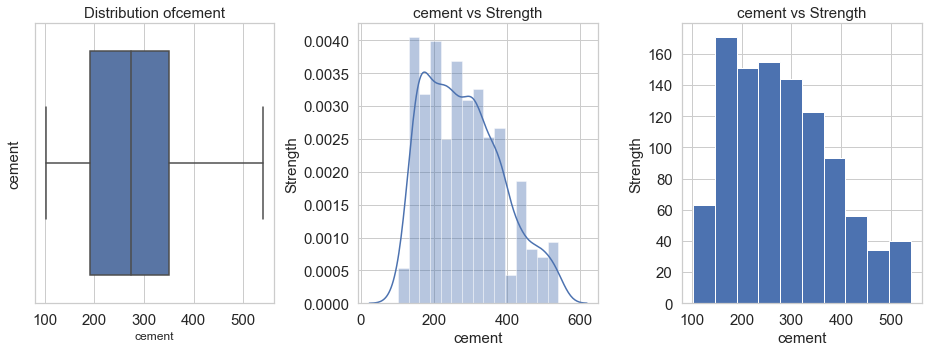

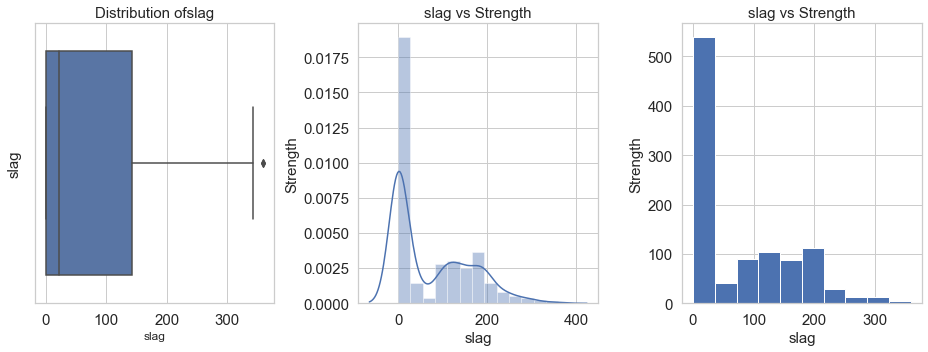

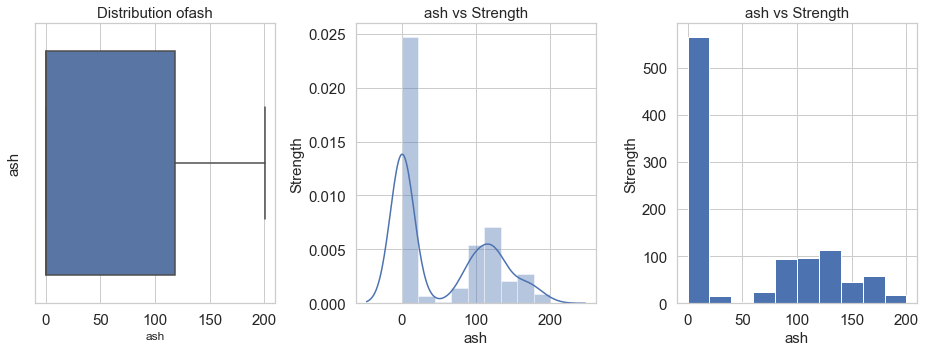

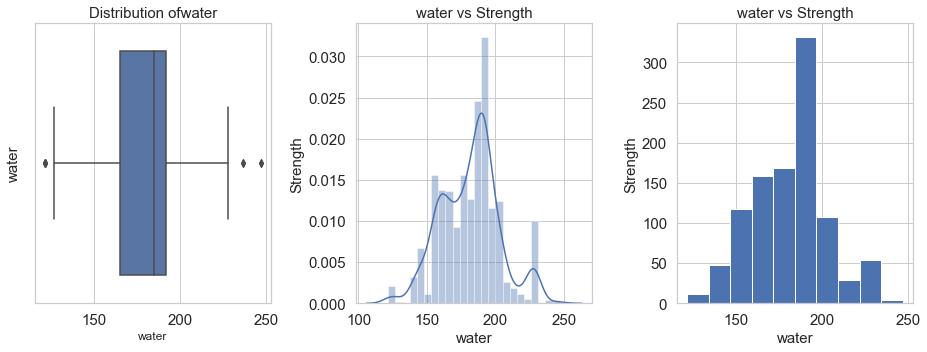

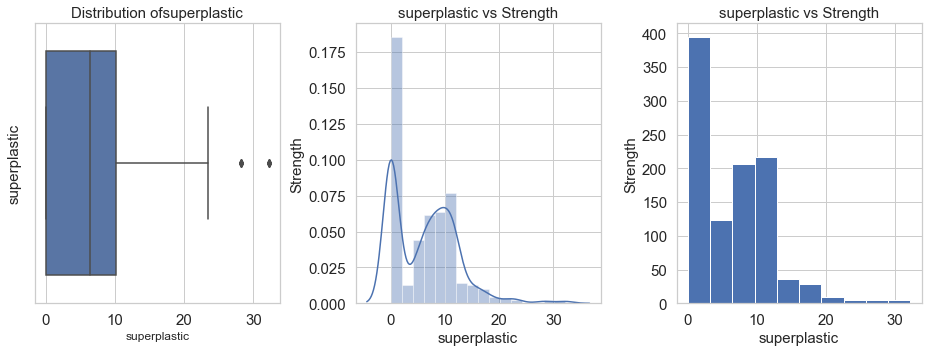

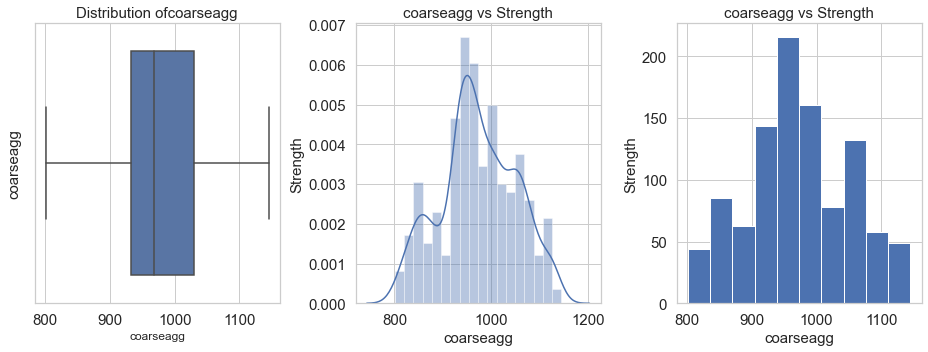

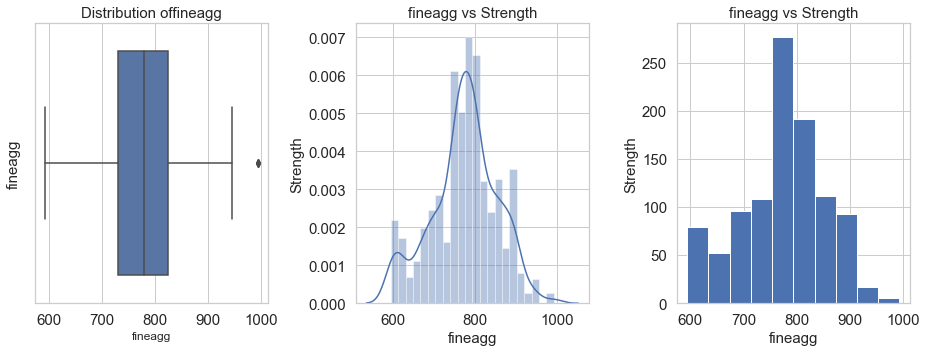

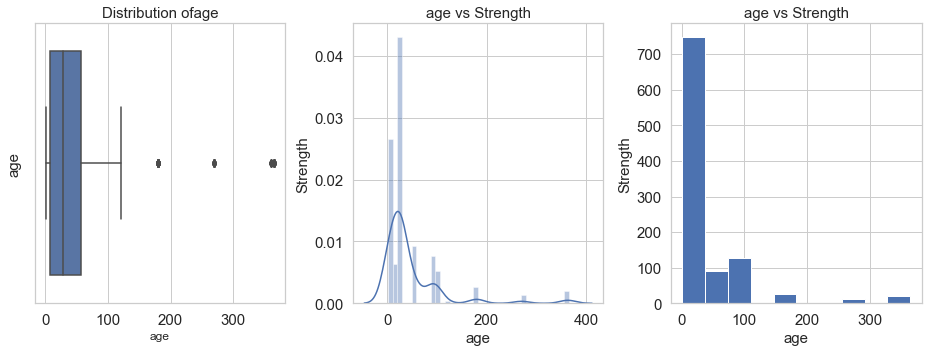

In [7]:
for i in df.columns[0:-1]:
    fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
    #boxplot
    sns.boxplot(x=i,data=df,orient='v',ax=ax1)
    ax1.set_ylabel(i, fontsize=15)
    ax1.set_title('Distribution of'+i, fontsize=15)
    ax1.tick_params(labelsize=15)

    #distplot
    sns.distplot(df[i],ax=ax2)
    ax2.set_xlabel(i, fontsize=15)
    ax2.set_ylabel('Strength', fontsize=15)
    ax2.set_title(i+' vs Strength', fontsize=15)
    ax2.tick_params(labelsize=15)

    #histogram
    ax3.hist(df[i])
    ax3.set_xlabel(i, fontsize=15)
    ax3.set_ylabel('Strength', fontsize=15)
    ax3.set_title(i+' vs Strength', fontsize=15)
    ax3.tick_params(labelsize=15)

    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout() 

from boxplot We can see observe that :
- distribution of outliers
- quartile range

from distplot and histogram We can see observe that :
- cement is almost normal. 
- slag has  three gausssians and rightly skewed.
- ash has two gaussians and rightly skewed.
- water has three guassians and slighly left skewed.
- superplastic has two gaussians and rightly skewed.
- coarseagg has three guassians and almost normal.
- fineagg has almost two guassians and looks like normal.
- age has multiple guassians and rightly skewed.

#### Range of values observed

In [8]:
for i in df.columns:
    print('---------------'+i+'-----------------')
    print('Range of values: ', df[i].max()-df[i].min())

---------------cement-----------------
Range of values:  438.0
---------------slag-----------------
Range of values:  359.4
---------------ash-----------------
Range of values:  200.1
---------------water-----------------
Range of values:  125.2
---------------superplastic-----------------
Range of values:  32.2
---------------coarseagg-----------------
Range of values:  344.0
---------------fineagg-----------------
Range of values:  398.6
---------------age-----------------
Range of values:  364
---------------strength-----------------
Range of values:  80.27


## 1.2. Multivariate Analysis

array([[<AxesSubplot:title={'center':'cement'}>,
        <AxesSubplot:title={'center':'slag'}>,
        <AxesSubplot:title={'center':'ash'}>],
       [<AxesSubplot:title={'center':'water'}>,
        <AxesSubplot:title={'center':'superplastic'}>,
        <AxesSubplot:title={'center':'coarseagg'}>],
       [<AxesSubplot:title={'center':'fineagg'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'strength'}>]], dtype=object)

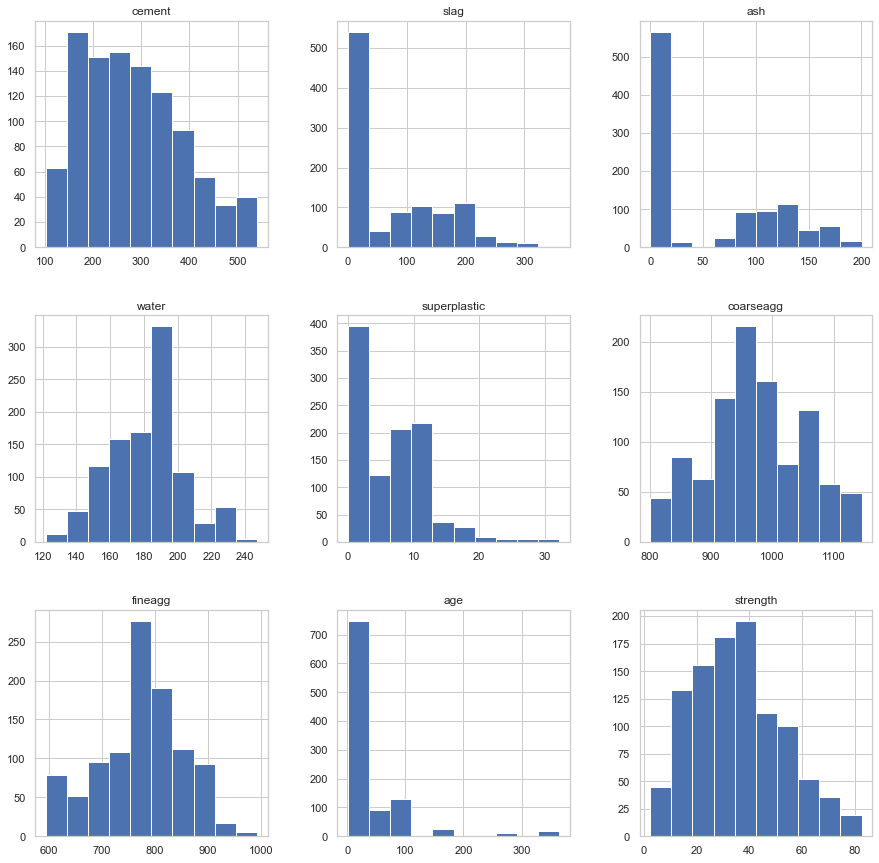

In [9]:
# Histogram 
df.hist(figsize=(15,15))

* It is also giving the same information like distance plot.

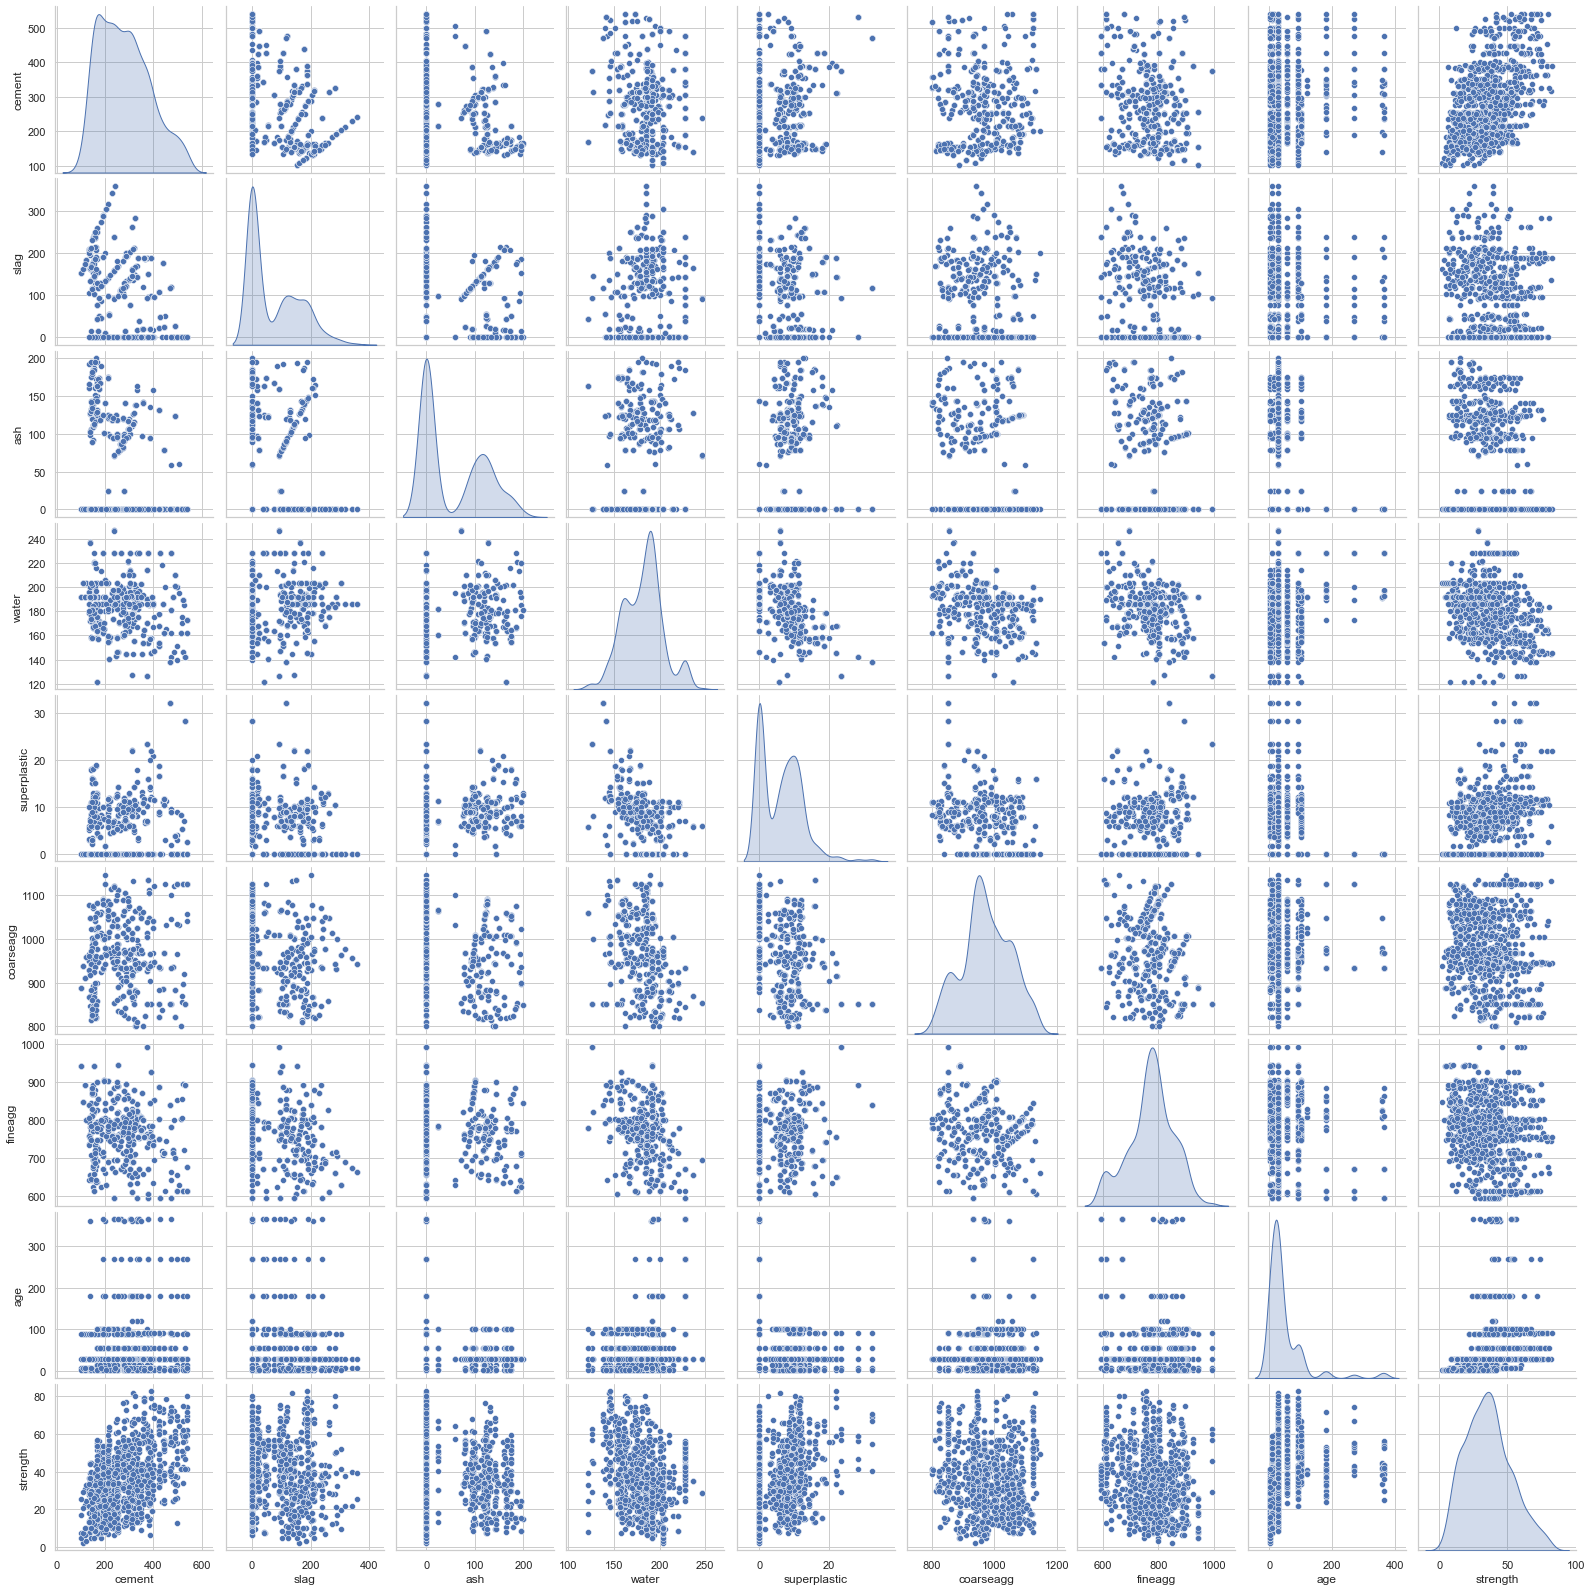

In [10]:
# pairplot- plot density curve instead of histogram in diagonal
sns.pairplot(df, diag_kind='kde')  

#### Diagonals Analysis
The diagonal gives the same information, we got using distplot.
* cement attribute have almost normal curve.
* slag has  two gausssians and rightly skewed.It shows the presence of outlies.
* ash has two gaussians and rightly skewed.It shows the presence of outlies.
* water has atleast guassians and slighly left skewed.It shows the presence of outlies.
* superplastic has multiple gaussians and rightly skewed.It shows the presence of outlies.
* coarseagg has three guassians and almost normal.
* fineagg has almost two guassians and looks like normal.
* age has multiple guassians and rightly skewed. It shows the presence of outlies.
* strength is close to a normal curve.

We not only have missing values problem but also outliers problem in the dataset.

#### Off Diagonal Analysis: Relationship between indpendent attributes
##### Scatter plots
- cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true  as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.
- superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.
- coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.


#### strength attribute : Relationship between dependent and independent attributes
strength: Now its comparing the target column with all other independent attributes and its showing us very vital information.
- strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor.
- strength vs slag: There is no particular trend.
- strength vs ash: There is also no particular trend.
- strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor.
- strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor.
- Other attributes does not give any strong relationship with strength.

Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

So, we will not use Linear model

In [11]:
# correlation matrix 
cor=df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


* Here, we can see the correlation value between the attributes.

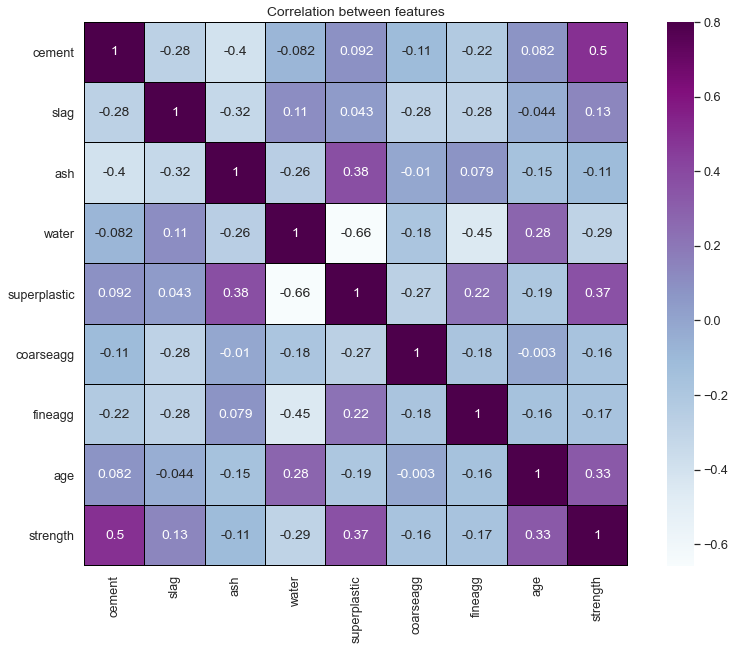

In [12]:
#heatmap
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="black")
plt.title('Correlation between features');

* It is also giving the same information we observed in pairplot analysis. 
* water shows significant negative relationship with superplastic and fineagg. It also shows some kind of positive relationship with slag and age.


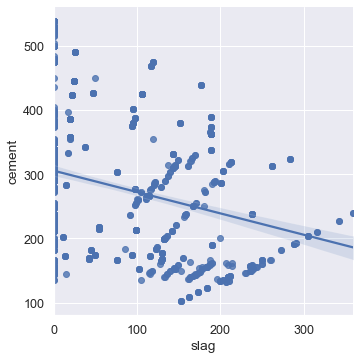

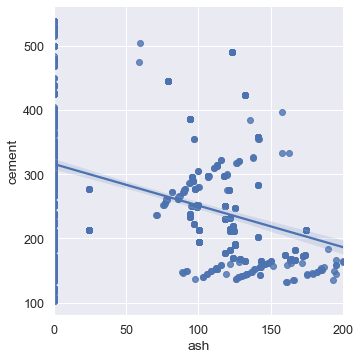

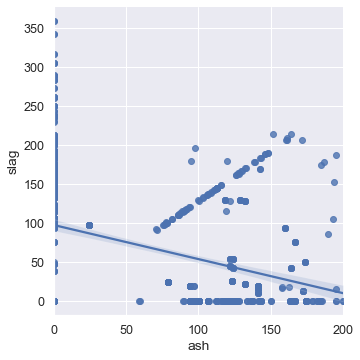

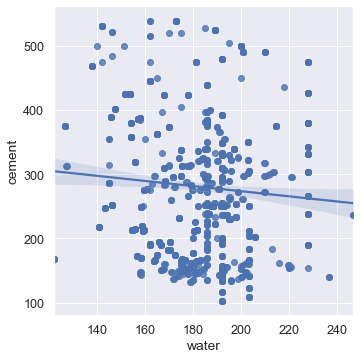

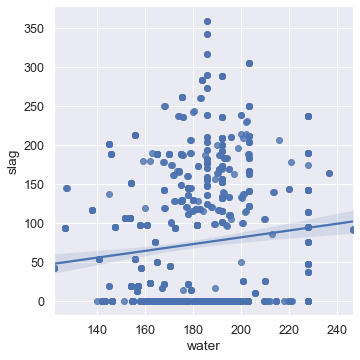

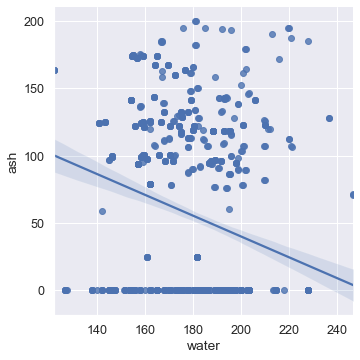

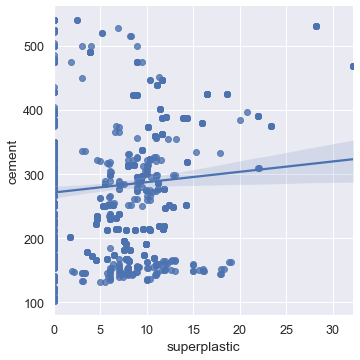

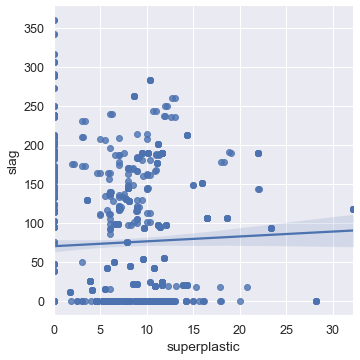

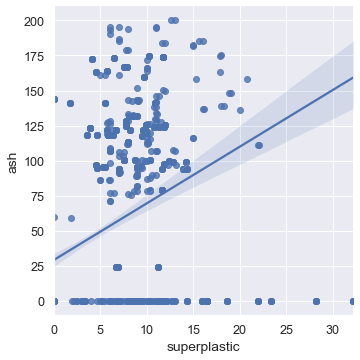

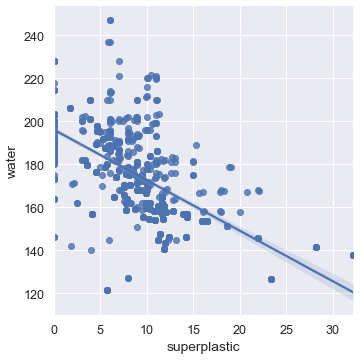

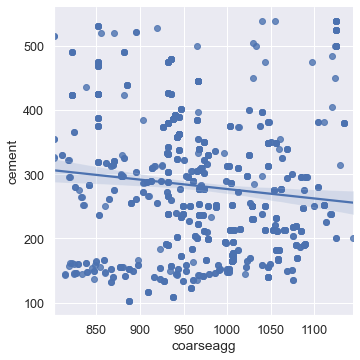

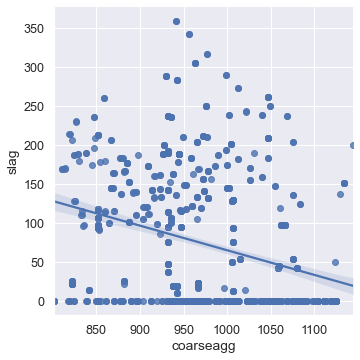

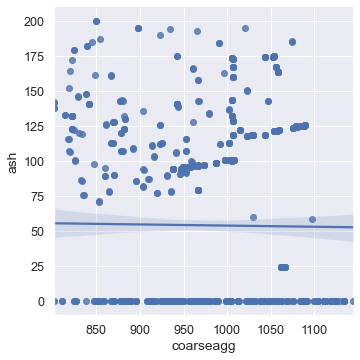

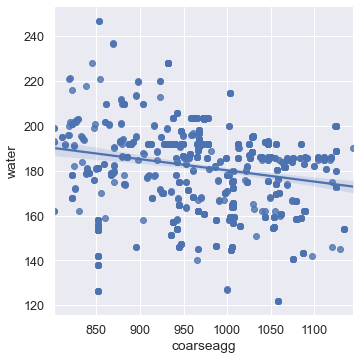

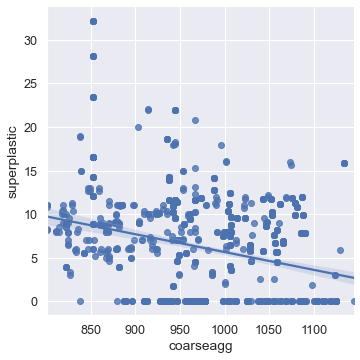

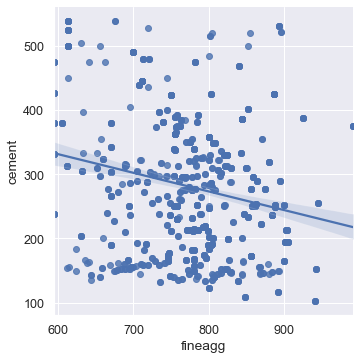

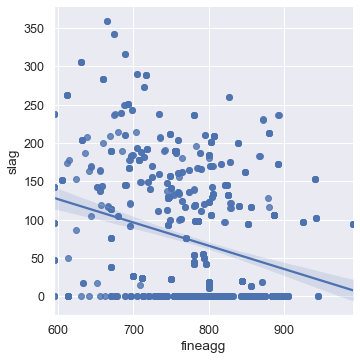

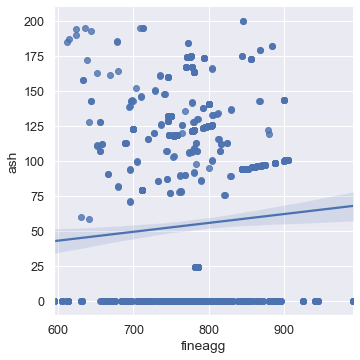

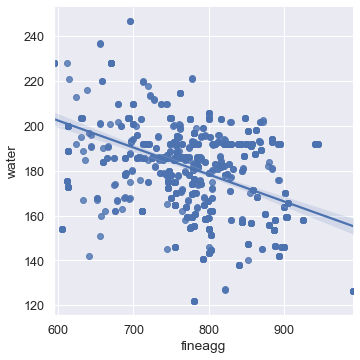

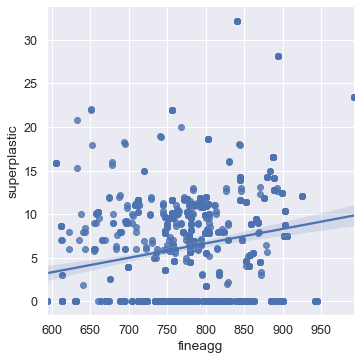

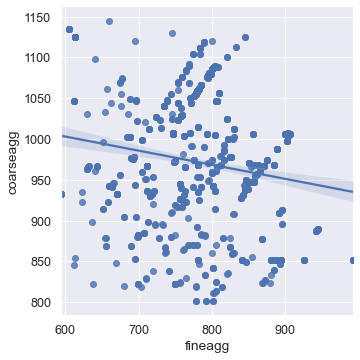

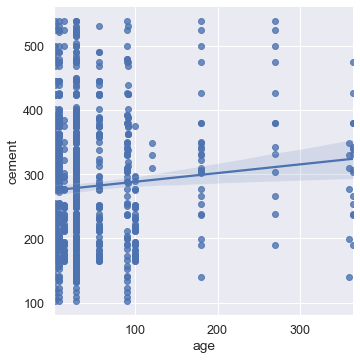

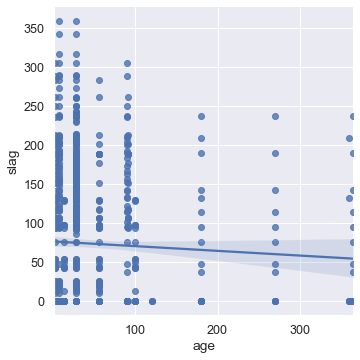

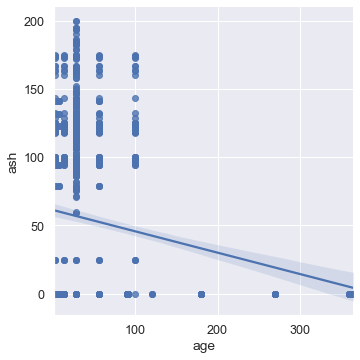

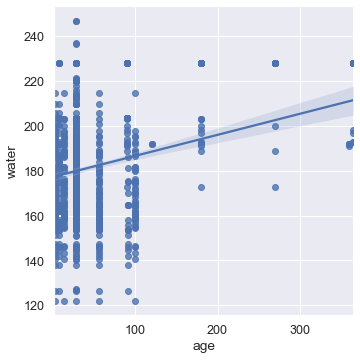

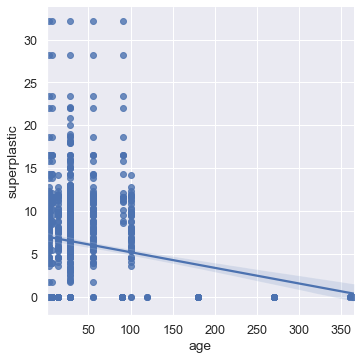

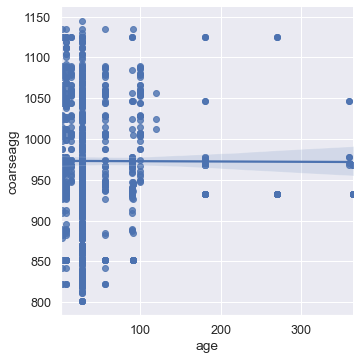

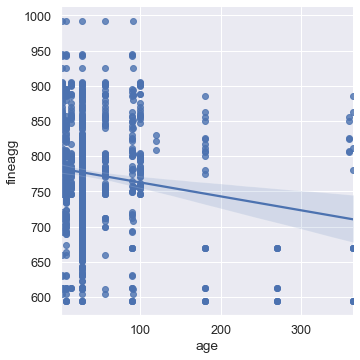

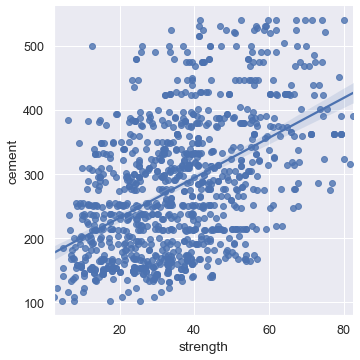

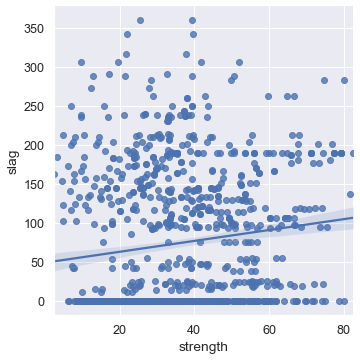

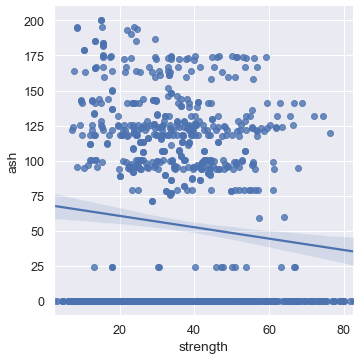

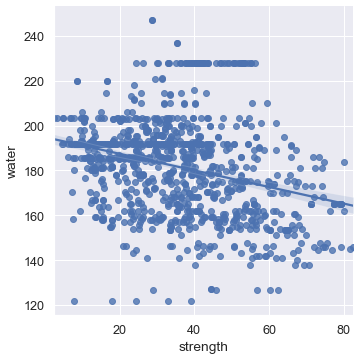

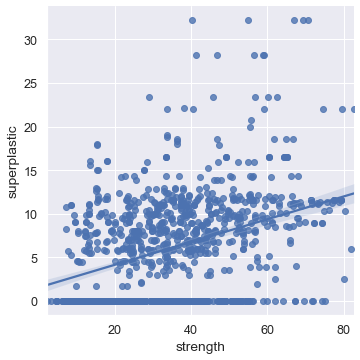

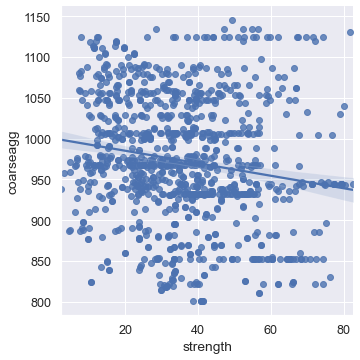

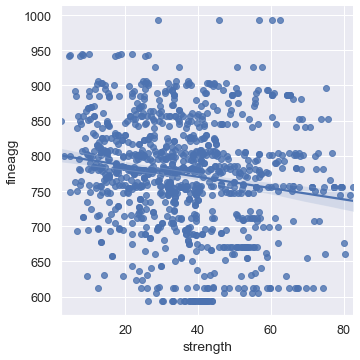

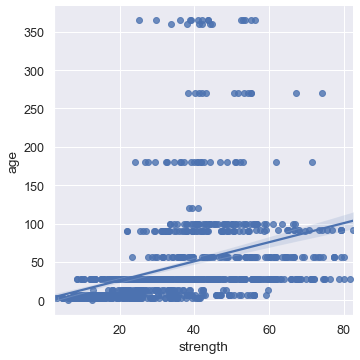

In [13]:
#lm plot
for i in df.columns:
    for j in df.columns:
        if i == j:
            break
        else:
            sns.lmplot(x=i,y=j,data=df)
            plt.show()

## 1.3. Strategies to handle different data challenges

## Checking for Missing Values

In [14]:
#Checking for missing values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

* We can see that there are no missing values.

## Checking for outliers

In [15]:
#Creating copy of original dataset
df1=df.copy()

<AxesSubplot:>

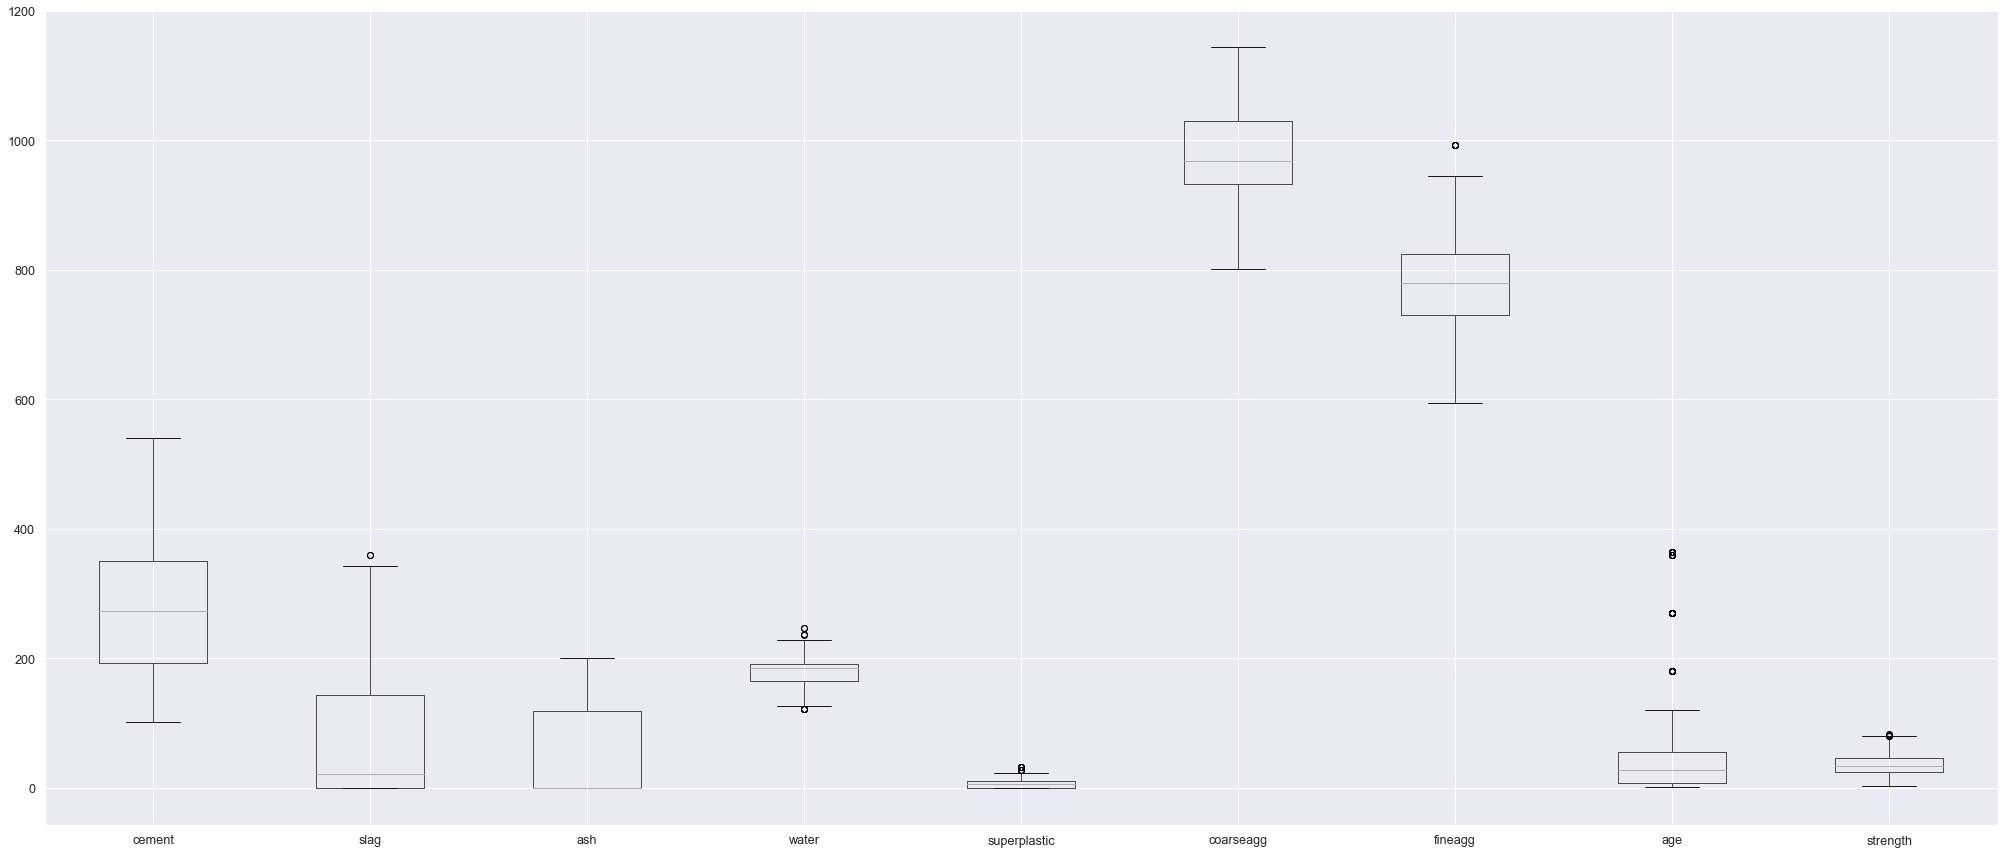

In [16]:
# again check for outliers in dataset after handling missing values using boxplot
df1.boxplot(figsize=(35,15))

* It also shows that slag, ash, water superplastic, and age contains outliers.

In [17]:
#Number of outliers present in the dataset
print('Number of outliers in cement: ',df1[((df1.cement - df1.cement.mean()) / df1.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',df1[((df1.slag - df1.slag.mean()) / df1.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',df1[((df1.ash - df1.ash.mean()) / df1.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',df1[((df1.water - df1.water.mean()) / df1.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',df1[((df1.superplastic - df1.superplastic.mean()) / df1.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',df1[((df1.coarseagg - df1.coarseagg.mean()) / df1.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',df1[((df1.fineagg - df1.fineagg.mean()) / df1.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',df1[((df1.age - df1.age.mean()) / df1.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


* Here, we have used Standard deviation method to detect the outliers.If we have any data point that is more than 3 times the standard deviation, then those points are very likely to be outliers.
* We can see that slag, water, superplastic and age contain outliers.

In [18]:
#Records which contains the outliers in slag attribute
print('Records containing outliers in slag: \n',df1[((df1.slag - df1.slag.mean()) / df1.slag.std()).abs() >3]['slag'])

Records containing outliers in slag: 
 21     342.1
564    342.1
918    359.4
990    359.4
Name: slag, dtype: float64


In [19]:
#Records which contains the outliers in water attribute
print('Records containing outliers in water: \n',df1[((df1.water - df1.water.mean()) / df1.water.std()).abs() >3]['water'])

Records containing outliers in water: 
 66     247.0
263    246.9
Name: water, dtype: float64


In [20]:
#Records which contains the outliers in superplastic attribute
print('Records containing outliers in superplastic: \n',df1[((df1.superplastic - df1.superplastic.mean()) / df1.superplastic.std()).abs() >3]['superplastic'])

Records containing outliers in superplastic: 
 44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64


In [21]:
#Records which contains the outliers in age attribute
print('Records containing outliers in age: \n',df1[((df1.age - df1.age.mean()) / df1.age.std()).abs() >3]['age'])

Records containing outliers in age: 
 64      365
133     365
149     270
157     360
159     365
198     365
256     270
262     270
270     270
297     270
313     270
323     360
361     360
393     365
448     360
465     365
484     365
570     270
601     365
623     270
632     270
713     365
720     365
754     365
755     360
850     270
878     270
901     365
919     360
951     270
957     365
995     365
1028    270
Name: age, dtype: int64


## Handling the outliers

In [22]:
#Replacing the outliers by median
for col_name in df1.columns[:-1]:
    q1 = df1[col_name].quantile(0.25)
    q3 = df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df1.loc[(df1[col_name] < low) | (df1[col_name] > high), col_name] = df1[col_name].median()

<AxesSubplot:>

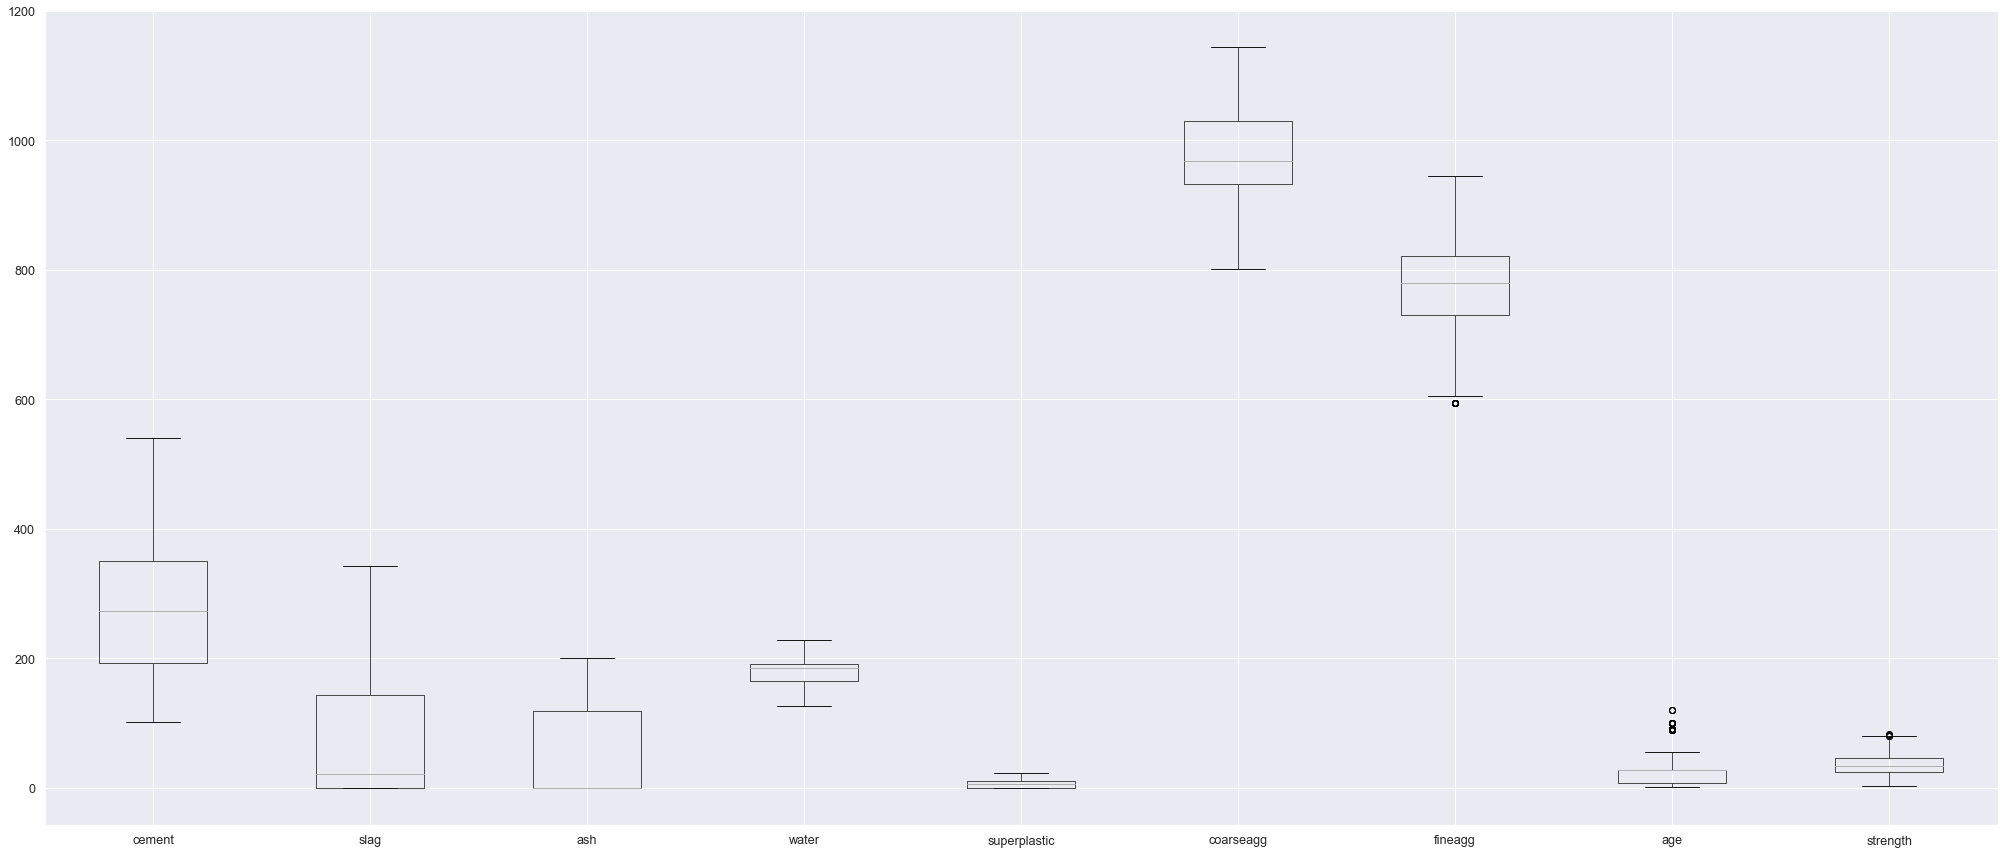

In [23]:
# again check for outliers in dataset using boxplot
df1.boxplot(figsize=(35,15))

In [24]:
#Number of outliers present in the dataset
print('Number of outliers in cement: ',df1[((df1.cement - df1.cement.mean()) / df1.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',df1[((df1.slag - df1.slag.mean()) / df1.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',df1[((df1.ash - df1.ash.mean()) / df1.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',df1[((df1.water - df1.water.mean()) / df1.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',df1[((df1.superplastic - df1.superplastic.mean()) / df1.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',df1[((df1.coarseagg - df1.coarseagg.mean()) / df1.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',df1[((df1.fineagg - df1.fineagg.mean()) / df1.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',df1[((df1.age - df1.age.mean()) / df1.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  2
Number of outliers in ash:  0
Number of outliers in water:  0
Number of outliers in superplastic:  5
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  3


# 2. Feature Engineering

### Scaling the features

In [25]:
#Scaling the dataset
df_z = df1.apply(zscore)
df_z=pd.DataFrame(df_z,columns=df.columns)

* Here, all the attributes in the same scale(unit) except the age attribute. Hence, we are scaling the attributes. We are using zscore for scaling.

## Splitting the data into independent and dependent attributes

In [26]:
#independent and dependent variables
X=df_z.iloc[:,0:8]
y = df_z.iloc[:,8]

## Splitting the data into three sets

In [27]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [28]:
X_train.shape,X_test.shape

((721, 8), (309, 8))

# 3. Model Building
# 4. Model Tuning

## DecisionTree Regression

In [29]:
model = DecisionTreeRegressor()
model.fit(X_train , y_train)

DecisionTreeRegressor()

In [30]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.351695
slag          0.094914
ash           0.011361
water         0.128605
superplastic  0.019429
coarseagg     0.034542
fineagg       0.030857
age           0.328597


* So, cement, age and water are significant attributes.
* Here, ash, coarseagg, fineagg, superplastic and slag are the less significant variable.These will impact less to the strength column. This we have seen in pairplot also.

In [31]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9917907420889983
Performance on testing data using DT: 0.8423110833385645
Accuracy DT:  0.8423110833385645
MSE:  0.16460518271953356


* There is a overfitting in the model as the dataset is performing 99% accurately in trainnig data. However, the accuracy on test data drops.

In [32]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.842311


In [33]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8644679486361863
Standard Deviation:  0.04183498024516498


In [34]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.842311
2,Decision Tree k fold,0.864468


### Iteration 2

### Drop the least significant variable

In [35]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   float64
 8   strength      1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


In [36]:
#Create a copy of the dataset
df2=df_z.copy()

In [37]:
#independent and dependent variable
X = df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [38]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor()

In [39]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.371975
slag          0.111549
water         0.156127
superplastic  0.031403
age           0.328946


In [40]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.9910459656545207
Performance on testing data using DT: 0.837857634018085
Accuracy DT:  0.837857634018085


In [41]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.842311
2,Decision Tree k fold,0.864468
3,Decision Tree2,0.837858


* The acuracy on testing dataset is not improved, still it is an overfit model.

## calculating value of GINI IMPURITY 

In [42]:
def gini_impurity(y):
    # calculate gini_impurity given labels/classes of each example
    m = y.shape[0]
    cnts = dict(zip(*np.unique(y, return_counts = True)))
    impurity = 1 - sum((cnt/m)**2 for cnt in cnts.values())
    return impurity


In [43]:
gini_impurity(X_train)

0.36029478244310387

* small value of gini index means data in decision tree is highly unordered therefore
  problem with this model is poor ordering of data

### K fold cross validation

## Pruning of Decision Tree

In [44]:
#independent and dependent variables
X=df_z.iloc[:,0:8]
y = df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [45]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [46]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.416953
slag          0.025822
ash           0.000000
water         0.135128
superplastic  0.017987
coarseagg     0.000000
fineagg       0.007793
age           0.396318


* Here, we can see that ash,coarseagg and fineagg are least significant variable.

### K fold cross validation

In [47]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6819101662123233
Standard Deviation:  0.06252311979215476


In [48]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.842311
2,Decision Tree k fold,0.864468
3,Decision Tree2,0.837858
5,Pruned Decision Tree k fold,0.681910


### Iteration2

In [49]:
#Create a copy of the dataset
df3=df_z.copy()

In [50]:
#independent and dependent variable
X = df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [51]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [52]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7249584363084667
Performance on testing data using DT: 0.6634677033758938
Accuracy DT:  0.6634677033758938
MSE:  0.35129266754854116


In [53]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2'], 'accuracy': [acc_RDT]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.842311
2,Decision Tree k fold,0.864468
3,Decision Tree2,0.837858
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468


## Random Forest Regressor

In [54]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [55]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9782719456613231
Performance on testing data using RFR: 0.9007284279078942
Accuracy DT:  0.9007284279078942
MSE:  0.10362564223939964


* This model is also overfit.

In [56]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.842311
2,Decision Tree k fold,0.864468
3,Decision Tree2,0.837858
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.900728


### K fold cross validation

In [57]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9087862925637833
Standard Deviation:  0.02180292760706626


In [58]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.842311
2,Decision Tree k fold,0.864468
3,Decision Tree2,0.837858
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.900728
8,Random Forest Regressor k fold,0.908786


## Gradient Boosting Regressor

In [59]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [60]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9378780229101811
Performance on testing data using GBR: 0.8801648363409269
Accuracy DT:  0.8801648363409269
MSE:  0.12509115686727912


In [61]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.842311
2,Decision Tree k fold,0.864468
3,Decision Tree2,0.837858
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.900728
8,Random Forest Regressor k fold,0.908786
9,Gradient Boost Regressor,0.880165


### K fold cross validation

In [62]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8909486702975776
Standard Deviation:  0.01599544034463461


In [63]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.842311
2,Decision Tree k fold,0.864468
3,Decision Tree2,0.837858
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.900728
8,Random Forest Regressor k fold,0.908786
9,Gradient Boost Regressor,0.880165
10,Gradient Boost Regressor k fold,0.890949


## KNN Regressor

In [64]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

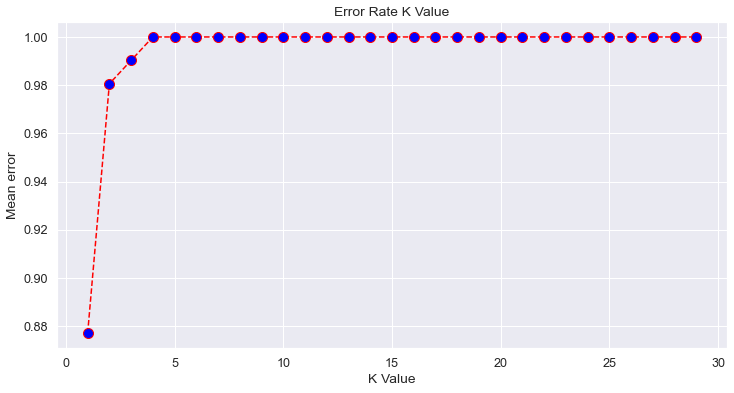

In [65]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [66]:
#k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [67]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using KNNR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using KNNR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_K=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_K)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using KNNR: 0.9076335493379125
Performance on testing data using KNNR: 0.8269662651486146
Accuracy KNNR:  0.8269662651486146
MSE:  0.1806230275714822


In [68]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': [acc_K]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.842311
2,Decision Tree k fold,0.864468
3,Decision Tree2,0.837858
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.900728
8,Random Forest Regressor k fold,0.908786
9,Gradient Boost Regressor,0.880165
10,Gradient Boost Regressor k fold,0.890949
15,KNN Regressor,0.826966


### K fold cross validation

In [69]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8248631355632433
Standard Deviation:  0.03387434750314286


In [70]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor k fold'], 'accuracy': [accuracy]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.842311
2,Decision Tree k fold,0.864468
3,Decision Tree2,0.837858
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.900728
8,Random Forest Regressor k fold,0.908786
9,Gradient Boost Regressor,0.880165
10,Gradient Boost Regressor k fold,0.890949
15,KNN Regressor,0.826966


## Support Vector Regressor

In [71]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [72]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.7073515901177051
Performance on testing data using SVR: 0.6703086999786682
Accuracy SVR:  0.6703086999786682
MSE:  0.3441516235257638


In [73]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': [acc_S]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.842311
2,Decision Tree k fold,0.864468
3,Decision Tree2,0.837858
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.900728
8,Random Forest Regressor k fold,0.908786
9,Gradient Boost Regressor,0.880165
10,Gradient Boost Regressor k fold,0.890949
15,KNN Regressor,0.826966


### K fold cross validation

In [74]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6811173139005782
Standard Deviation:  0.044123261509679455


In [75]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR k fold'], 'accuracy': [accuracy]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.842311
2,Decision Tree k fold,0.864468
3,Decision Tree2,0.837858
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.900728
8,Random Forest Regressor k fold,0.908786
9,Gradient Boost Regressor,0.880165
10,Gradient Boost Regressor k fold,0.890949
15,KNN Regressor,0.826966


## Ensemeble KNN Regressor, SVR, LR

In [76]:
#Multiple model Ensemble
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear') 

In [77]:
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KN', KNeighborsRegressor(n_neighbors=3)),
                            ('SVM', SVR(kernel='linear'))])

In [78]:
y_pred = evc.predict(X_test)
# performance on train data
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.8211270767364878
Performance on testing data using ensemble: 0.7766895888170584
Accuracy ensemble:  0.7766895888170584
MSE:  0.23310484854724


In [79]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'19'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.842311
2,Decision Tree k fold,0.864468
3,Decision Tree2,0.837858
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.900728
8,Random Forest Regressor k fold,0.908786
9,Gradient Boost Regressor,0.880165
10,Gradient Boost Regressor k fold,0.890949
15,KNN Regressor,0.826966


### K fold cross validation

In [80]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(evc,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7816411360898966
Standard Deviation:  0.02828641733039116


In [81]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble k fold'], 'accuracy': [accuracy]},index={'20'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.842311
2,Decision Tree k fold,0.864468
3,Decision Tree2,0.837858
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.900728
8,Random Forest Regressor k fold,0.908786
9,Gradient Boost Regressor,0.880165
10,Gradient Boost Regressor k fold,0.890949
15,KNN Regressor,0.826966


* After applying all the models we can see that Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold are giving better results as compared to other models.
* Now as the dataset have different gaussians, we can apply k means clustering and then we can apply the models and compare the accuracy.

## Bootstrap Sampling

In [82]:
concrete_XY = X.join(y)

### Using Gradient Boosting Regressor

In [ ]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

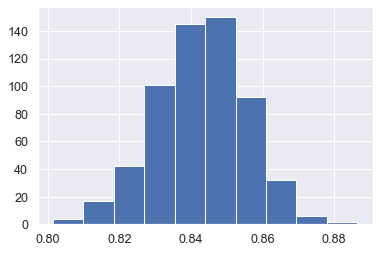

95.0 confidence interval 81.7% and 86.7%


In [87]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### Using Random Forest Regressor

In [ ]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

# 5. Model performance range at 95% confidence level 

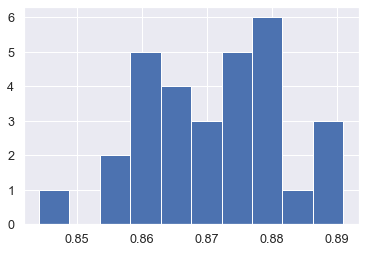

95.0 confidence interval 85.2% and 89.1%


In [90]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

The bootstrap random forest regression model performance is between 85.2%-89.1% which is an excellent score and is much better than other regression algorithms.